In [1]:
from sympy import *
import numpy as  np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import least_squares
# Импортируем все необходимые функции из библиотеки SymPy
from sympy import init_printing, solve, symbols
 
x, y = symbols('x, y')
eq1 = Eq(3 * x **2 - 3 * y, 0)
eq2 = Eq(3 * y **2 - 3 * x, 0)
 
sol = solve([eq1, eq2], [x, y])
print(sol)

[(0, 0), (1, 1), ((-1/2 - sqrt(3)*I/2)**2, -1/2 - sqrt(3)*I/2), ((-1/2 + sqrt(3)*I/2)**2, -1/2 + sqrt(3)*I/2)]


In [2]:
x = 1
y = 2
print(-30 * y ** 4)
G = np.array([[6, -2],
              [-2, -480]])
G

-480


array([[   6,   -2],
       [  -2, -480]])

In [3]:
def func_rosen(x):
    r = np.sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2, axis=0)
    return r

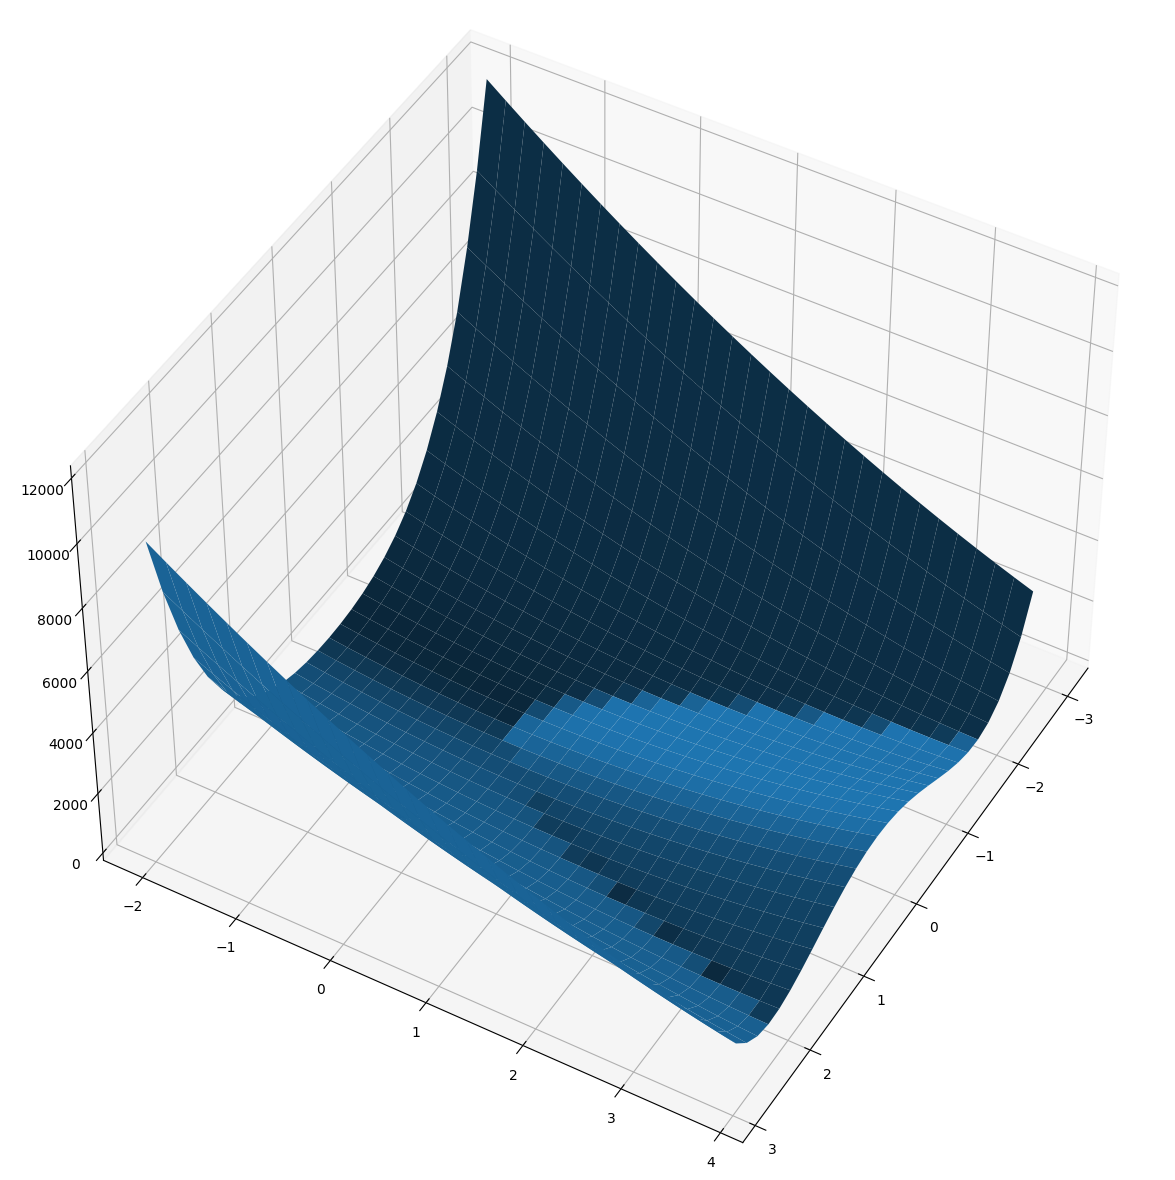

In [4]:
graph = plt.figure(figsize=[25, 15])
ax = graph.add_subplot(projection='3d')
ax.view_init(45, 30)
x1 = np.arange(-3, 3, 0.2)
x2 = np.arange(-2, 4, 0.2)
x1, x2 = np.meshgrid(x1, x2)
y = func_rosen(np.array([x1,x2]))
surf = ax.plot_surface(x1, x2, y)
plt.show()

In [5]:
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='powell')
print(result_point.x)

[1. 1. 1. 1. 1.]


In [6]:
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='nelder-mead')
print(result_point.x)

[1.02760651 1.05589639 1.11509457 1.2440091  1.54862169]


In [7]:
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point =least_squares(func_rosen, x1, method='trf')
print(result_point.x)

[0.93865173 0.88210868 0.776457   0.60278764 0.36076162]


In [24]:
a,b,w=symbols(' a b w' )
g = a**2 + 2 * b**2
print('Целевая функция для аргументов a и b :\n f = ', g)
q = a + b - 20
print('Функция ограничений: ', q,'= 0')
f = 3*a**2 + a + 4*b + 5*b**2 + w*(a + b - 20)
print('Функция Лагранжа :\n ',f)
fa = f.diff(a)
print('df/da =',fa,'= 0')
fb = f.diff(b)
print('df/db =',fb,'= 0')
fw = f.diff(w)
print('df/dw =',fw,'= 0')
sols = solve([fa,fb,fw],a,b,w)
print('Стационарная точка M(x,y):\n',float(sols[a]),',',float(sols[b]))

Целевая функция для аргументов a и b :
 f =  a**2 + 2*b**2
Функция ограничений:  a + b - 20 = 0
Функция Лагранжа :
  3*a**2 + a + 5*b**2 + 4*b + w*(a + b - 20)
df/da = 6*a + w + 1 = 0
df/db = 10*b + w + 4 = 0
df/dw = a + b - 20 = 0
Стационарная точка M(x,y):
 12.6875 , 7.3125


In [9]:
# Подключаем аккуратный вывод формул
init_printing()

# Создаём переменные
x1, x2, x1_tilde, lambda1, lambda2 = symbols(
    "x_1 x_2 xtilde_2 \lambda_1 \lambda_2", real=True
)

# Пишем систему уравнений для переменных
dLdx1 = -x2 + lambda1 - lambda2
dLdx2 = -x1 + lambda1
dLdx1_tilde = 2 * lambda2 * x1_tilde
dLdlambda1 = x1 + x2 - 10
dLdlambda2 = -x1 + 6 + x1_tilde**2

# Решаем систему уравнений с помощью функции solve
solution = solve(
    [dLdx1, dLdx2, dLdx1_tilde, dLdlambda1, dLdlambda2],
    x1,
    x2,
    x1_tilde,
    lambda1,
    lambda2,
)

print(solution)

[(6, 4, 0, 6, 2)]


In [10]:
w0, w1 = symbols('w0 w1' )
L = (2.1 - w0 - w1)**2 + (2.9 - w0 -3 * w1)**2 + (4.1 - w0 - 5 * w1)**2

fw0 = L.diff(w0)
print('dL/dw0 =',fw0,'= 0 \n')

fw1 = L.diff(w1)
print('dL/dw1 =',fw1,'= 0 \n')

sols = solve([fw0,fw1],w0,w1)
print('Стационарная точка M(w0,w1):\n',float(sols[w0]),',',float(sols[w1]))

dL/dw0 = 6.0*w0 + 18.0*w1 - 18.2 = 0 

dL/dw1 = 18.0*w0 + 70.0*w1 - 62.6 = 0 

Стационарная точка M(w0,w1):
 1.5333333333333334 , 0.5


In [11]:
f = np.array([8, 2, 8, 3, 5, 6, 5, 15])
np.gradient(f, 7)

array([-0.85714286,  0.        ,  0.07142857, -0.21428571,  0.21428571,
        0.        ,  0.64285714,  1.42857143])

In [12]:
def fun(x, y, a=1, b=1):
    return a * (x ** 2) + b * (y ** 2)

In [13]:
def grad(x, y, a=1, b=1):
    return np.array([2 * a * x, 2 * b * y])

In [14]:
def grad_descend(grad, step_size=0.2, num_steps=30):
    lst = []
    x = np.random.uniform(0, 3, size = 2)
    lst.append(x)
    for i in range(num_steps):
        x = x - step_size * grad(lst[-1][0], lst[-1][1])
        lst.append(x)
    return np.array(lst)

In [15]:
def plot_grad(fun, trace):
    fig = plt.figure(figsize=(10, 8))
    x_ = np.linspace(-1, 1, 100)
    y_ = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(x_, y_)
    z = fun(x, y)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x, y, z, alpha=0.6)
    ax.contour(x, y, z, zdir='z', offset=z.min())
    z_trace = fun(trace[:, 0], trace[:, 1])
    ax.plot(trace[:, 0], trace[:, 1], z_trace, "o-")
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())

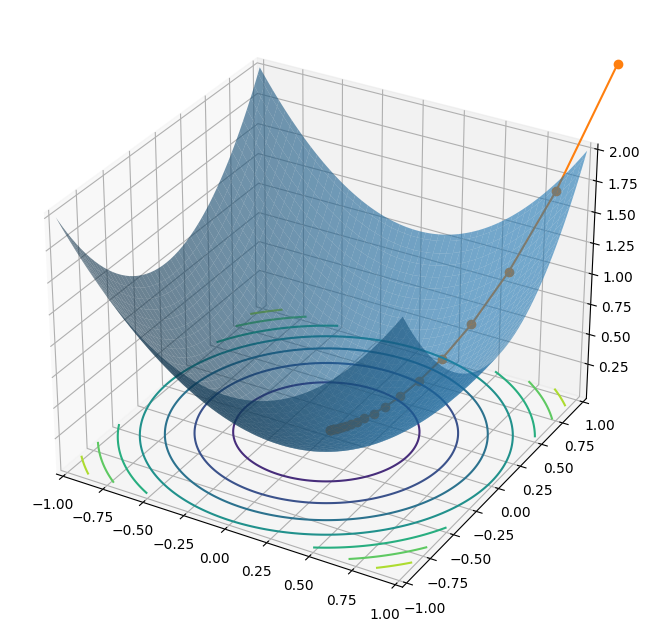

In [16]:
trace = grad_descend(grad, 0.1, 20)
plot_grad(fun, trace = trace)

In [21]:
x,y,z=symbols(' x y z' )
f = x**3 - 2 * x**2 + y**2 + z**2 - 2 * x * y + x * z - y * z + 3 * z

fx = f.diff(x)
print('df/dx =',fx)
fy = f.diff(y)
print('df/dy =',fy)
fz = f.diff(z)
print('df/dz =',fz)
x = 0
y = 0
z = 0
print(fx)


df/dx = 3*x**2 - 4*x - 2*y + z
df/dy = -2*x + 2*y - z
df/dz = x - y + 2*z + 3
3*x**2 - 4*x - 2*y + z


In [23]:
x = -0.68
f = - x**4 + 6 * x**3 - 4 * x**2 + 80
f 